In [1]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

In [2]:
from evrp.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str
from evrp.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp.milp.evrptw import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

# Convert Schneider instance to E-VRP-TW-V2G

In [ ]:
schneider_instance = 'c106C15'
convert_txt_instances_to_csv(schneider_instance)

# Full solve

Objective options: {Schneider} OR {OpEx CapEx Cycle EA DCM Delivery}

Constraint options: {Start=End FullStart=End NoXkappaBounds NoMinVehicles NoSymmetry NoXd}

In [3]:
instance = 'c106C15_e'
fpath = 'config/test_instances/' + instance + '.csv'

In [4]:
m = EVRPTW(problem_type='Schneider')
m.full_solve(fpath)

2021-05-03 08:49:46 INFO     Building abstract model
2021-05-03 08:49:46 INFO     Defining parameters and sets
2021-05-03 08:49:46 INFO     Defining variables
2021-05-03 08:49:46 INFO     Defining constraints
2021-05-03 08:49:46 INFO     Importing EVRPTW MILP instance: c106C15_e
2021-05-03 08:49:46 INFO     Reading CSV
2021-05-03 08:49:46 INFO     Creating graph
2021-05-03 08:49:46 INFO     Creating timeseries data
2021-05-03 08:49:46 INFO     Creating duplicates and extended graph
2021-05-03 08:49:46 INFO     Calculating distance matrix
2021-05-03 08:49:47 INFO     Using Google Maps Distance API to generate distance matrix


ValueError: Invalid API key provided.

In [110]:
print(m.results)


Problem: 
- Name: x1025
  Lower bound: 3114.327799709916
  Upper bound: 3114.360249229511
  Number of objectives: 1
  Number of constraints: 9493
  Number of variables: 1025
  Number of binary variables: 652
  Number of integer variables: 652
  Number of continuous variables: 373
  Number of nonzeros: 74267
  Sense: minimize
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Wall time: 127.32531809806824
  Error rc: 0
  Time: 127.49234390258789
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



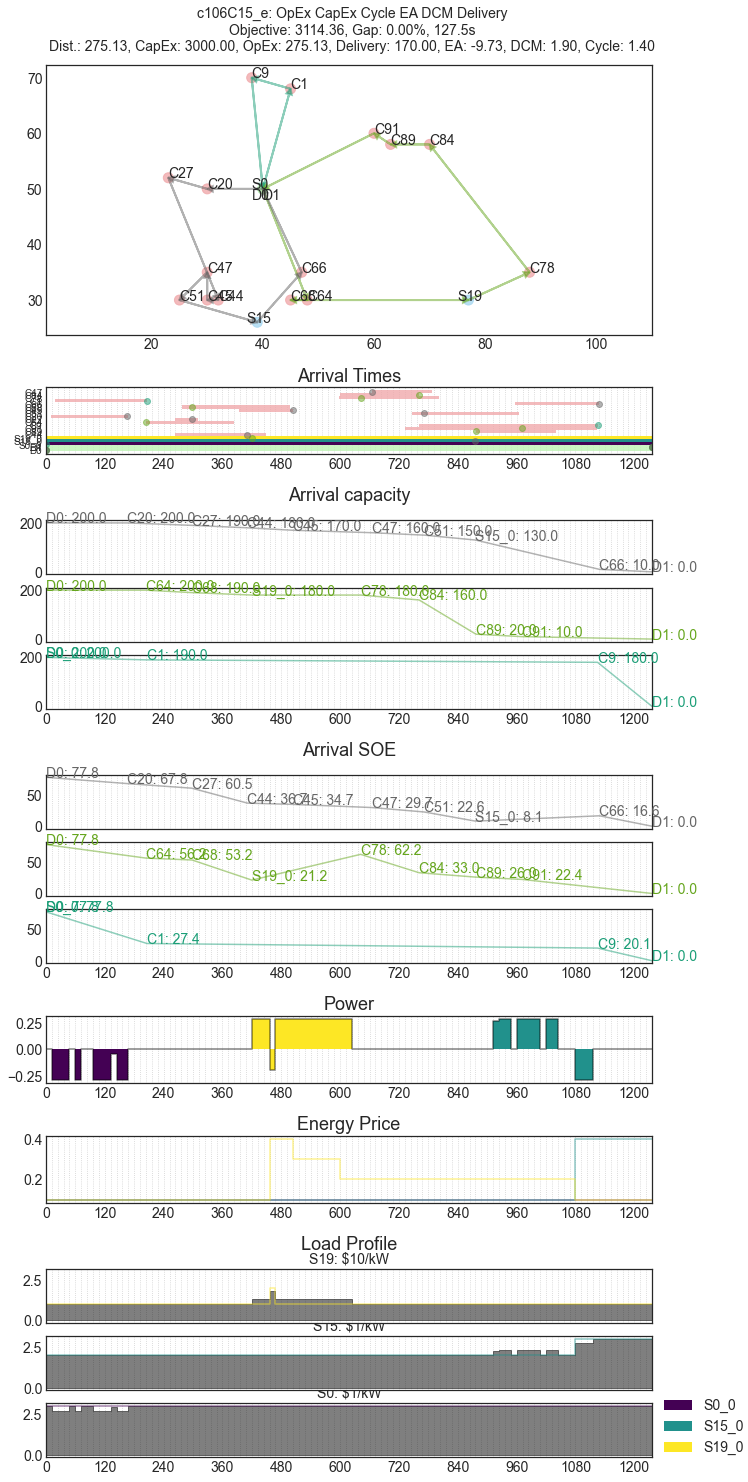

In [111]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [114]:
routes

state           xw     xq         xa
from  to                                         
D0    D0       NaN     0.000000  200.0  77.750000
      S0_0     1.0     0.000000  200.0  77.750000
      C20      1.0   165.719890  200.0  67.750000
      C64      1.0   204.000000  200.0  56.209341
S0_0  C1       1.0   206.000000  190.0  27.379861
C20   C27      1.0   297.230271  190.0  60.469890
C64   C68      1.0   298.000000  190.0  53.209341
C27   C44      1.0   411.000000  180.0  36.700161
C68   S19_0    1.0   420.000000  180.0  21.209341
C44   C45      1.0   503.000000  170.0  34.700161
S19_0 C78      1.0   641.793836  180.0  62.172395
C45   C47      1.0   664.000000  160.0  29.700161
C78   C84      1.0   761.000000  160.0  32.966231
C47   C51      1.0   771.439780  150.0  22.629094
C51   S15_0    1.0   876.000000  130.0   8.068874
C84   C89      1.0   877.000000   20.0  25.966231
C89   C91      1.0   970.605551   10.0  22.360680
C1    C9       1.0  1125.000000  180.0  20.099751
S15_0 C66      1.0  1129.000000   10.0  16.552945
C9    D1       1.0  1236.000000    0.0   0.000000
C66   D1       1.0  1236.000000    0.0   0.000000
C91   D1       1.0  1236.000000    0.0   0.000000

In [113]:
m.data['d']

,D0,D1,S0_0,S15_0,S19_0,C44,C89,C91,C9,C64,C27,C20,C51,C45,C68,C66,C1,C78,C84,C47
D0,0.000000,0.000000,0.000000,24.020824,42.059482,21.540659,24.351591,22.360680,20.099751,21.540659,17.117243,10.000000,25.000000,22.360680,20.615528,16.552945,18.681542,50.289164,31.048349,18.027756
D1,0.000000,0.000000,0.000000,24.020824,42.059482,21.540659,24.351591,22.360680,20.099751,21.540659,17.117243,10.000000,25.000000,22.360680,20.615528,16.552945,18.681542,50.289164,31.048349,18.027756
S0_0,0.000000,0.000000,0.000000,24.020824,42.059482,21.540659,24.351591,22.360680,20.099751,21.540659,17.117243,10.000000,25.000000,22.360680,20.615528,16.552945,18.681542,50.289164,31.048349,18.027756
S15_0,24.020824,24.020824,24.020824,0.000000,38.209946,8.062258,40.000000,39.962482,44.011362,9.848858,30.528675,25.632011,14.560220,9.848858,7.211103,12.041595,42.426407,49.819675,44.553339,12.727922
S19_0,42.059482,42.059482,42.059482,38.209946,0.000000,45.000000,31.304952,34.481879,55.865911,29.000000,58.309519,51.078371,52.000000,47.000000,32.000000,30.413813,49.678969,12.083046,28.861739,47.265209
C44,21.540659,21.540659,21.540659,8.062258,45.000000,0.000000,41.773197,41.036569,40.447497,16.000000,23.769729,20.099751,7.000000,2.000000,13.000000,15.811388,40.162171,56.222771,47.201695,5.385165
C89,24.351591,24.351591,24.351591,40.000000,31.304952,41.773197,0.000000,3.605551,27.730849,31.764760,40.447497,33.955854,47.201695,43.278170,33.286634,28.017851,20.591260,33.970576,7.000000,40.224371
C91,22.360680,22.360680,22.360680,39.962482,34.481879,41.036569,3.605551,0.000000,24.166092,32.310989,37.854986,31.622777,46.097722,42.426407,33.541020,28.178006,17.000000,37.536649,10.198039,39.051248
C9,20.099751,20.099751,20.099751,44.011362,55.865911,40.447497,27.730849,24.166092,0.000000,41.231056,23.430749,21.540659,42.059482,40.792156,40.607881,36.138622,7.280110,61.032778,34.176015,35.902646
C64,21.540659,21.540659,21.540659,9.848858,29.000000,16.000000,31.764760,32.310989,41.231056,0.000000,33.301652,26.907248,23.000000,18.000000,3.000000,5.099020,38.118237,40.311289,35.608988,18.681542


# Archive, fix route, modify objective, and warmstart solve

In [374]:
m.archive_instance_result()

In [375]:
m.fix_variables(['xgamma'])

In [376]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

2021-02-09 02:45:05 INFO     Problem type: Opex Capex EA DCM cycle


In [378]:
m.warmstart_solve()

2021-02-09 02:45:18 INFO     Solving instance with warmstart...


Using license file C:\Users\ramia\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-10
Read LP format model from file C:\Users\ramia\AppData\Local\Temp\tmp3zs2h4pa.pyomo.lp
Reading time = 0.02 seconds
: 691 rows, 319 columns, 1400 nonzeros
Read MIP start from file C:\Users\ramia\AppData\Local\Temp\tmpmewdvle3.gurobi.mst
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter Cuts to 3
   Prev: -1  Min: -1  Max: 3  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 691 rows, 319 columns and 1400 nonzeros
Model fingerprint: 0x5f799ab0
Model has 270 quadratic objective terms
Model has 963 quadratic constraints
Variable types: 181 continuous, 138 integer (138 binary)
Coefficient statistics:
  Matrix range    

2021-02-09 02:45:18 INFO     Done


In [379]:
print(m.results)


Problem: 
- Name: 
  Lower bound: 2273.6874295104776
  Upper bound: 2273.740064895064
  Number of objectives: 1
  Number of constraints: 1654
  Number of variables: 319
  Number of binary variables: 138
  Number of integer variables: 138
  Number of continuous variables: 181
  Number of nonzeros: 1400
  Sense: minimize
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Wall time: 0.06878662109375
  Error rc: 0
  Time: 0.29122233390808105
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



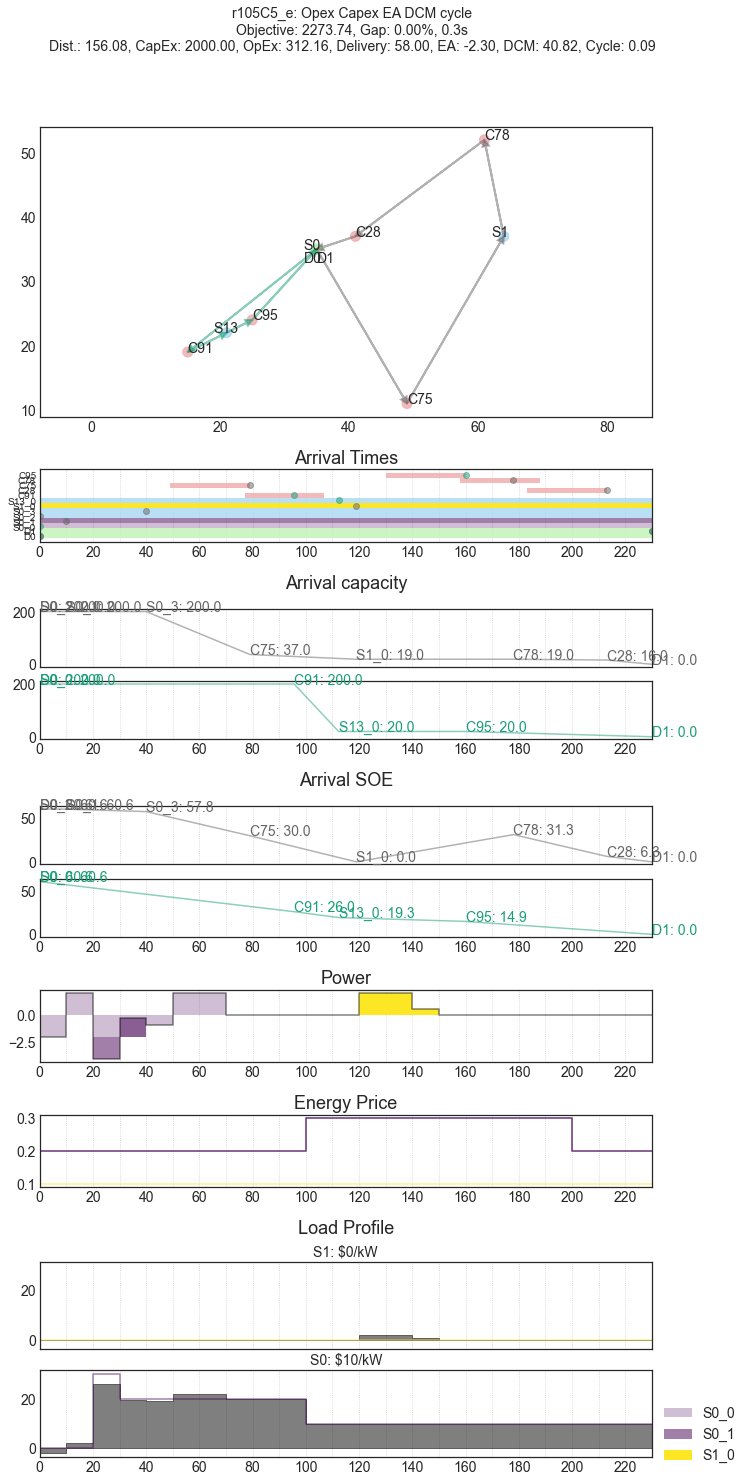

In [380]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [63]:
m.archive_instance_result()

In [64]:
m.instance_archive

{'r105C5_e Schneider cycle': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc6283e58>,
 'r105C5_e Opex Capex EA DCM cycle': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc641fd38>,
 'r105C5_e Opex Capex EA DCM cycle v2': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc6327438>,
 'r105C5_e Opex Capex EA DCM NoXkappaBounds': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc4256288>,
 'r105C5_e Opex Capex EA DCM NoXkappaBounds wxgamma': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc6184c18>,
 'r105C5_e Opex Capex EA DCM NoXkappaBounds wsplitxgamma': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fc6a35a20>,
 'r105C5_e Opex Capex EA DCM wsplitxgamma': <pyomo.core.base.PyomoModel.ConcreteModel at 0x7f8fa8a13dc8>}

In [65]:
m.remake_model('Opex Capex EA DCM cycle wsplitxgamma', fpath)

2021-02-11 18:22:06 INFO     Defining parameters and sets
2021-02-11 18:22:06 INFO     Defining variables
2021-02-11 18:22:06 INFO     Defining constraints
2021-02-11 18:22:06 INFO     Importing EVRPTW MILP instance: r105C5_e
2021-02-11 18:22:06 INFO     Reading CSV
2021-02-11 18:22:06 INFO     Creating graph
2021-02-11 18:22:06 INFO     Creating timeseries data
2021-02-11 18:22:06 INFO     Creating duplicates and extended graph
2021-02-11 18:22:06 INFO     Calculating distance matrix
2021-02-11 18:22:06 INFO     Creating parameters
2021-02-11 18:22:06 INFO     Creating instance
2021-02-11 18:22:06 INFO     Problem type: Opex Capex EA DCM cycle wsplitxgamma


In [391]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [392]:
m.fix_variables(['xgamma'])

In [35]:
m.make_solver(solve_options={'TimeLimit': 60 * 5})

In [66]:
m.warmstart_solve()

2021-02-11 18:22:08 INFO     Solving instance with warmstart...


Using license file /Users/ramiariss/gurobi.lic
Academic license - for non-commercial use only - expires 2021-03-21
Read LP format model from file /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmp9bv28907.pyomo.lp
Reading time = 0.01 seconds
x452: 1378 rows, 452 columns, 9559 nonzeros
Read MIP start from file /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmpnier5xjl.gurobi.mst
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1378 rows, 452 columns and 9559 nonzeros
Model fingerprint: 0xa1e8fe6c
Model has 276 quadratic constraints
Variable types: 181 continuous, 271 integer (271 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [4e+00, 2e+02]
  Objective range  [3e-02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range

2021-02-11 18:22:56 INFO     Done


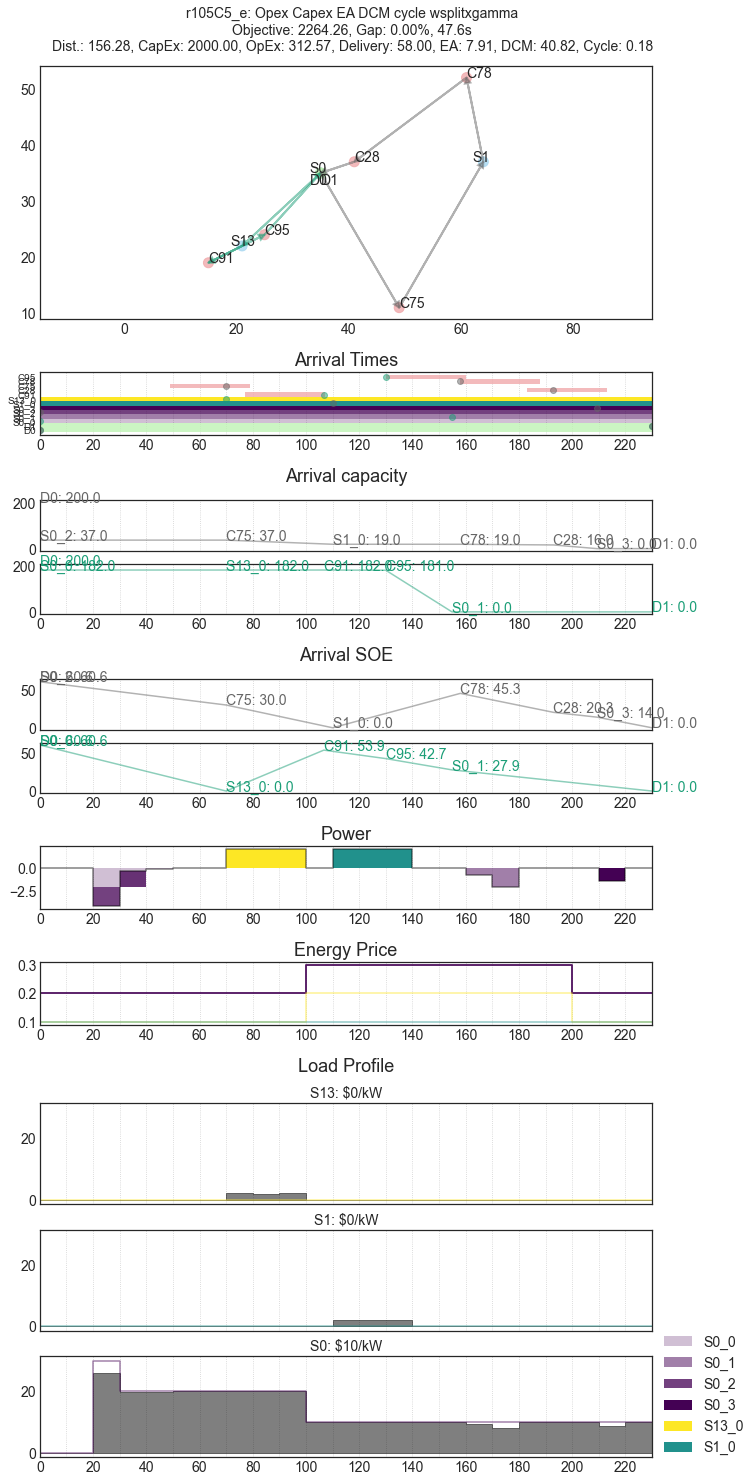

In [67]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [62]:
routes

state          xw     xq         xa
from  to                                        
D0    S0_0     1.0    0.000000   37.0  60.630000
      S0_1     1.0    0.000000   21.0  60.630000
      D0       NaN    0.000000  200.0  60.630000
S0_1  S13_0    1.0   49.104973   21.0   0.000000
S0_0  C75      1.0   69.983338   37.0  30.016662
S13_0 C91      1.0  107.000000   21.0  53.921796
C75   S1_0     1.0  110.000000   19.0   0.000000
C91   C95      1.0  130.000000   20.0  42.741456
C95   S0_2     1.0  154.866069    0.0  27.875387
S1_0  C78      1.0  158.000000   19.0  45.332941
C78   C28      1.0  193.000000   16.0  20.332941
C28   S0_3     1.0  209.324555    0.0  14.008386
S0_2  D1       1.0  230.000000    0.0   0.000000
S0_3  D1       1.0  230.000000    0.0   0.000000

# Check infeasible constraints

In [348]:
from pyomo.util.infeasible import log_infeasible_constraints

In [349]:
log_infeasible_constraints(m.instance)